In [2]:
import os
import re
import ROOT
import uproot
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 3)

Welcome to JupyROOT 6.28/07


In [7]:
def gaussian(x, mu, sig):
    return (1/(sig*np.sqrt(2.*np.pi)))*np.exp(-(x-mu)**2/(2*sig**2))

In [8]:
# get 3D histogram
fname = os.path.expandvars("$HOME/Software/HK_Software/WCSimFQTuningTools/Time/old_tools/11_tpdfhist.root")
with uproot.open(fname) as f:
    H, tresbins, trueqbins, mombins = f["hist_tpdf"].to_numpy()

# compute bin centers
moms   = (mombins  [1:] + mombins  [:-1])/2.
trueqs = (trueqbins[1:] + trueqbins[:-1])/2.
tress  = (tresbins [1:] + tresbins [:-1])/2.

fname = os.path.expandvars("$HOME/Software/HK_Software/WCSimFQTuningTools/Time/old_tools/11_tpdfpar.root")
f = uproot.open(fname)
f.classnames()

{'gtcmnpar_0;1': 'TGraphErrors',
 'gtcsgpar_0;1': 'TGraphErrors',
 'gtcmnpar_1;1': 'TGraphErrors',
 'gtcsgpar_1;1': 'TGraphErrors',
 'gtcmnpar_2;1': 'TGraphErrors',
 'gtcsgpar_2;1': 'TGraphErrors',
 'gtcmnpar_3;1': 'TGraphErrors',
 'gtcsgpar_3;1': 'TGraphErrors',
 'gtcmnpar_4;1': 'TGraphErrors',
 'gtcsgpar_4;1': 'TGraphErrors',
 'gtcmnpar_5;1': 'TGraphErrors',
 'gtcsgpar_5;1': 'TGraphErrors',
 'gtcmnpar_6;1': 'TGraphErrors',
 'gtcsgpar_6;1': 'TGraphErrors',
 'hmean_150;1': 'TH1D',
 'hsigm_150;1': 'TH1D',
 'hmean_250;1': 'TH1D',
 'hsigm_250;1': 'TH1D',
 'hmean_350;1': 'TH1D',
 'hsigm_350;1': 'TH1D',
 'hmean_450;1': 'TH1D',
 'hsigm_450;1': 'TH1D',
 'hmean_550;1': 'TH1D',
 'hsigm_550;1': 'TH1D',
 'hmean_650;1': 'TH1D',
 'hsigm_650;1': 'TH1D',
 'hmean_750;1': 'TH1D',
 'hsigm_750;1': 'TH1D',
 'hmean_850;1': 'TH1D',
 'hsigm_850;1': 'TH1D',
 'hmean_950;1': 'TH1D',
 'hsigm_950;1': 'TH1D',
 'hmean_1000;1': 'TH1D',
 'hsigm_1000;1': 'TH1D',
 'htpdfinfo;1': 'TH1D',
 'hmean_step0;1': 'TH2D',
 'hsig

In [9]:
# choose a random momentum and read mean values
mom = int(np.random.choice(moms))
print("p = ", mom)

mean, trueqbins_  = f[f"hmean_{mom}"].to_numpy()
assert (trueqbins_ == trueqbins).all()
sigma, trueqbins_ = f[f"hsigm_{mom}"].to_numpy()
assert (trueqbins_ == trueqbins).all()

# # equivalent, use 2D (p, trueq) hmean_step0
# # better not to use because it contains failed fit as non-zeros
# hmean_step0, mombins_, trueqbins_ = f["hmean_step0"].to_numpy()

# assert (mombins_ == mombins).all()
# assert (trueqbins_ == trueqbins).all()

p =  1000


log10(trueq) =  -1.46


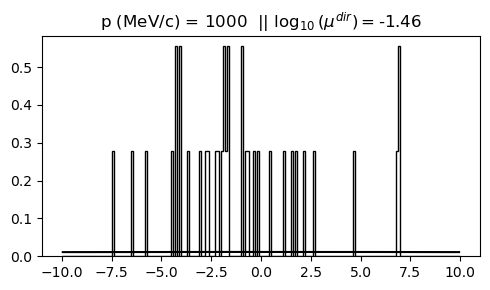

In [68]:
# choose random trueq
trueq = np.random.choice(trueqs)
print("log10(trueq) = ", trueq)

# find projection
pi  = np.digitize(mom, mombins)-1
tqi = np.digitize(trueq, trueqbins)-1
proj = H[:, tqi, pi]
norm = np.sum(proj * (tresbins[1:] - tresbins[:-1]))

# find mean and sigma from gaussian
mu  = mean [tqi]
sig = sigma[tqi]

# plot
plt.figure()

plt.title(f"p (MeV/c) = {mom}  || " + r"$\log_{10}(\mu^{dir})=$" + f"{round(trueq, 3)}")

plt.stairs(proj/norm, tresbins, color="k")
plt.plot(tress, gaussian(tress, mu, sig), color="k")

plt.tight_layout()

In [62]:
proj.sum()

36.0

True